In [47]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.8.0


In [53]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, val_images, train_labels, val_labels) = train_test_split(train_images, train_labels, test_size=0.33, random_state=42)


In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [55]:
train_images.shape

(40200, 28, 28)

In [56]:
len(train_labels)


40200

In [57]:
train_labels


array([9, 3, 2, ..., 6, 6, 1], dtype=uint8)

In [59]:
train_labels = np.where(train_labels>0, 1, 0)
val_labels = np.where(val_labels>0, 1, 0)

In [60]:
test_images.shape

(10000, 28, 28)

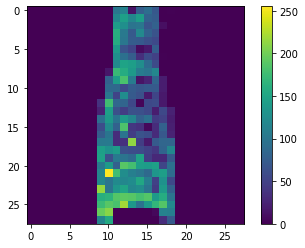

In [61]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()


In [62]:
# Preprocess both train and test
train_images = train_images / 255.0
val_images = val_images /255.0
test_images = test_images / 255.0


In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy']
)



In [71]:
cw = int(1/(1-np.sum(train_labels)/len(train_labels)))

In [72]:
model.fit(
    train_images, 
    train_labels, 
    validation_data=(val_images, val_labels), 
    class_weight={0:cw, 1:1},
    epochs=2
)


Epoch 1/2
1257/1257 [==============================] - 16s 11ms/step - loss: 0.3607 - accuracy: 0.9218 - val_loss: 0.2005 - val_accuracy: 0.9263
Epoch 2/2
1257/1257 [==============================] - 10s 8ms/step - loss: 0.2977 - accuracy: 0.9315 - val_loss: 0.1605 - val_accuracy: 0.9399


In [83]:
pred = model.predict(train_images)


In [79]:
B = np.where(pred>0.5, 1, 0).reshape((-1)).astype(np.float32)

In [84]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(train_labels, pred)

In [45]:


np.sum(A*B)

53140

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3527 - accuracy: 0.8796 - 782ms/epoch - 2ms/step

Test accuracy: 0.8795999884605408


In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [35]:
predictions = probability_model.predict(test_images)


In [41]:
for pair in zip(list(predictions[1]), class_names):
    print(pair)


(5.9892518e-05, 'T-shirt/top')
(3.6508465e-14, 'Trouser')
(0.99979645, 'Pullover')
(5.390233e-10, 'Dress')
(8.579558e-05, 'Coat')
(8.918108e-12, 'Sandal')
(5.7978446e-05, 'Shirt')
(2.033656e-12, 'Sneaker')
(2.9201763e-12, 'Bag')
(5.991143e-14, 'Ankle boot')


In [44]:
# Add the image to a batch where it's the only member.
img = test_images[1]

img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)


In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


NameError: name 'plot_value_array' is not defined